# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

* Los datos que necesito para realizar una prediccion con un grado alto de acierto, son datos de propiedades inmobiliarias segun si es comercial o no comercial, ubicacion, tipo de edificacion si es departamento o casa habitacion, metros cuadrados construidos, cantidad de habitaciones, dimensiones del terreno segun sea el caso, dimensiones de ambientes, caracteristicas constructivas, cantidad de plantas de la casa, valores habituales de mercado, expensas, precios de otros inmuebles similares, precio actual de la construccion, antiguedad del inmueble.
* Se necesitan estos datos para obtener una estimacion confiable de la valuacion de las propiedades inmobiliarias.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [119]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [120]:
# Cargamos el dataset
data_prop = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [121]:
# Convertimos los datos en un dataframe de Pandas.
df = pd.DataFrame(data_prop)

In [122]:
# Conocemos la informacion del dataframe
# Tenemos 11 columnas categoricas y 8 columnas numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [123]:
# Visualizamos el tipo de datos en cada columna del dataset
df.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [124]:
# Visualizamos las primeras cinco instancias.
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [125]:
# Conocemos la dimensionalidad del dataset.Cuenta con 146.660 filas y 19 columnas
df.shape

(146660, 19)

In [126]:
# Imprimimos en pantalla las columnas del dataset.
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [127]:
# Conocemos la cantidad de instancias que contiene el dataset.
df.index

RangeIndex(start=0, stop=146660, step=1)

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [128]:
# Se visualiza la cantidad de valores faltantes por columnas.
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [129]:
# Visualizamos la columna property_type
df['property_type']

0         Departamento
1                   PH
2                   PH
3                   PH
4                   PH
              ...     
146655    Departamento
146656    Departamento
146657    Departamento
146658    Departamento
146659    Departamento
Name: property_type, Length: 146660, dtype: object

In [130]:
# Visualizamos que son 10 los tipos de propiedades.
df['property_type'].nunique()

10

In [131]:
# Visualizamos los nombres de tipos de propiedades.
df['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [132]:
# Recontamos las instancias agrupados por tipo de propiedad 
df.groupby('property_type', sort = False).size()

property_type
Departamento       107326
PH                  14298
Casa                21521
Lote                 1312
Casa de campo         322
Oficina               658
Otro                  374
Local comercial       325
Cochera               259
Depósito              265
dtype: int64

Text(0.5, 0, 'Cantidad')

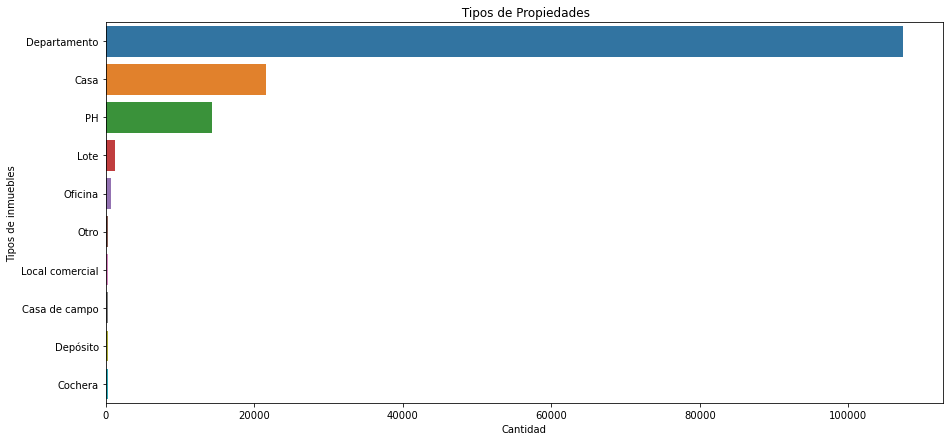

In [133]:
# Graficamos las cantidades de los tipos de propiedades.
plt.figure(figsize = (15,7))
sns.countplot(data = df, y = "property_type",order = df['property_type'].value_counts(ascending=False).index)
plt.title(' Tipos de Propiedades')
plt.ylabel('Tipos de inmuebles')
plt.xlabel('Cantidad')


In [134]:
# Logramos visualizar que el tipo de propiedad departamento es el mas abundante. 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [135]:
# Visualizamos las regiones del dataset
regions = df['l2'].unique()
regions

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste'],
      dtype=object)

In [136]:
# Visualizamos los barrios del dataset
barrios = df['l3'].unique()
barrios

array(['San Cristobal', 'Boedo', 'Palermo', 'La Plata', 'Villa Crespo',
       'Parque Patricios', 'Villa Pueyrredón', 'Pilar', 'Tigre', 'Abasto',
       'Flores', 'Morón', 'Nuñez', 'Almagro', 'Belgrano', 'Floresta',
       'Recoleta', 'Balvanera', 'Caballito', 'Chacarita', 'San Telmo',
       'Colegiales', 'La Matanza', 'San Isidro', 'San Miguel',
       'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás',
       'Villa Urquiza', 'Vicente López', 'Parque Centenario',
       'General San Martín', 'Villa General Mitre', 'Lanús', 'Ituzaingó',
       'Boca', 'Once', 'Retiro', 'Monserrat', 'Avellaneda',
       'San Fernando', 'Puerto Madero', 'Villa Ortuzar',
       'Parque Chacabuco', 'Centro / Microcentro', 'Tres de Febrero',
       'Liniers', 'Coghlan', 'Congreso', 'Paternal', 'Saavedra',
       'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución',
       'Mataderos', 'Villa Devoto', 'Parque Avellaneda',
       'Villa del Parque', 'Esteban Echeverría', 'Lomas de Zamora'

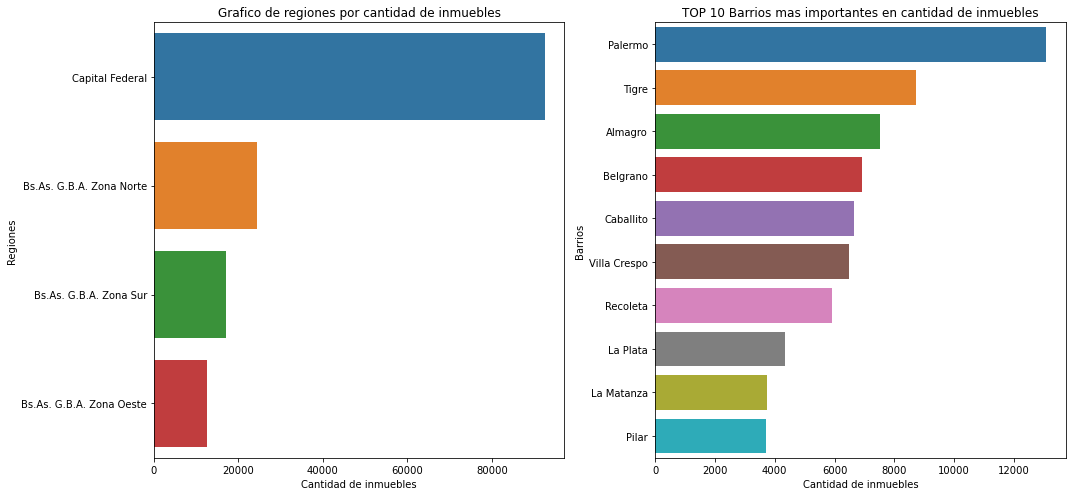

In [137]:
#Grafico de regiones por cantidad de inmuebles y el Top 10 de barrios mas importantes por inmuebles
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.countplot(data = df , y='l2', order = df['l2'].value_counts(ascending=False).index)
plt.title('Grafico de regiones por cantidad de inmuebles')
plt.ylabel('Regiones')
plt.xlabel('Cantidad de inmuebles')

plt.subplot(1,2,2)
sns.countplot(data = df , y='l3', order = df['l3'].value_counts(ascending=False).index[:10])
plt.title('TOP 10 Barrios mas importantes en cantidad de inmuebles')
plt.ylabel('Barrios')
plt.xlabel('Cantidad de inmuebles')

plt.tight_layout()
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [138]:
# Filtramos el dataset por Region con mas inmuebles publicados y con las 3 clases mas abundantes de tipos de propiedades.
region1 = df[(df.l2 == 'Capital Federal')]
data = region1[(region1.property_type == 'Departamento') | (region1.property_type == 'PH') | (region1.property_type == 'Casa')]
data.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [139]:
#Obteniendo las estadisticas del dataset.
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [140]:
data.describe(include = 'all')

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
count,91485,91485,91485,86951.000000,86937.000000,91485,91485,91485,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04,91485,91485,91485,91485,91485
unique,362,408,362,NaN,NaN,1,1,57,NaN,NaN,NaN,NaN,NaN,NaN,1,43106,58676,3,1
top,2019-07-31,9999-12-31,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,NaN,NaN,NaN,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,6951,10986,6951,NaN,NaN,91485,91485,13007,NaN,NaN,NaN,NaN,NaN,NaN,91485,3377,235,79029,91485
mean,NaN,NaN,NaN,-34.599081,-58.436002,NaN,NaN,NaN,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.023957,0.036297,NaN,NaN,NaN,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-34.696419,-58.530468,NaN,NaN,NaN,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,-34.613757,-58.459605,NaN,NaN,NaN,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,-34.599446,-58.433789,NaN,NaN,NaN,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,-34.584148,-58.410143,NaN,NaN,NaN,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05,NaN,NaN,NaN,NaN,NaN


In [141]:
# Eliminamos las columnas que no nos aportan informacion a nuestro analisis 
# La ubicacion del inmueble la vamos a estudiar en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa, 
# ya que son las variables mas importantes del dataset.

data.drop(['lat', 'lon','start_date','end_date','created_on'], axis = 1, inplace = True)

<AxesSubplot:xlabel='surface_total'>

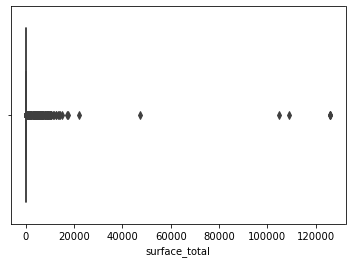

In [142]:
# Graficamos a fin de conocer los valores de la columna de superficie total.
sns.boxplot(x=data["surface_total"])

<AxesSubplot:xlabel='surface_total'>

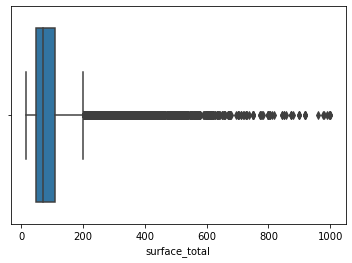

In [143]:
# Generamos una mascara a fin de filtrar el dataset donde la superficie total se encuentre entre 15 m2 y 1000 m2
mask = data["surface_total"]>= 15
data = data[mask]
mask2 = data["surface_total"]<= 1000
data = data[mask2]
sns.boxplot(x=data["surface_total"])

<AxesSubplot:xlabel='surface_total'>

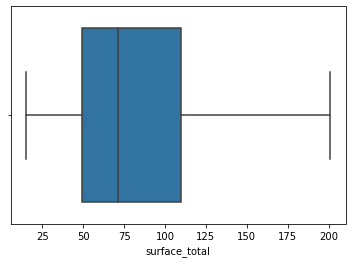

In [144]:
# Graficamos el dataset filtrado. Ocultando los valores atípicos. Vemos que la mayoria de los datos de 
# superficie total se encuentran entre 50 y 115 metros cuadrados aproximadamente.
sns.boxplot(x=data["surface_total"], showfliers = False)

(81137, 14)

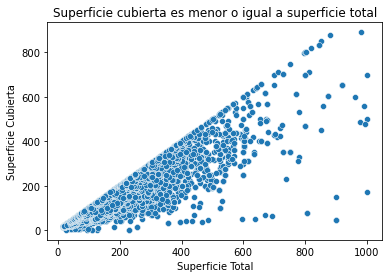

In [145]:
# Filtrando las instancias donde surface_covered es mayor a surface_total
data = data[data['surface_covered'] <= data['surface_total']]
sns.scatterplot(x="surface_total", y="surface_covered", data = data)
plt.title('Superficie cubierta es menor o igual a superficie total')
plt.xlabel('Superficie Total')
plt.ylabel('Superficie Cubierta')
data.shape

<AxesSubplot:xlabel='price'>

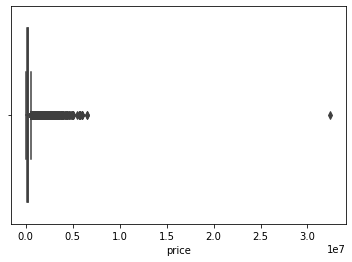

In [146]:
# Graficamos la columna precio del dataset con un grafico de caja.
sns.boxplot(x=data["price"])

In [147]:
# Filtramos el dataset para obtener un precio menor a $ 4.000.000.
m3 = data.price < 4000000
data = data[m3]

In [148]:
# Precio promedio del dataset
data.price.mean()

262907.8683470626

<AxesSubplot:xlabel='price'>

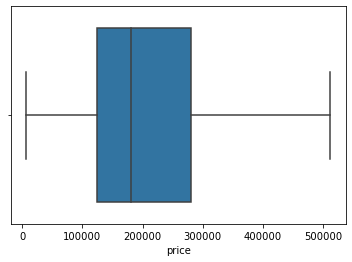

In [149]:
# graficamos la columna precio ya filtrado. Sin los valores atípicos.
sns.boxplot(x=data["price"], showfliers = False)

In [150]:
# Conocemos la estadistica basica del precio del dataset
data.price.describe().apply("{0:.2f}".format)

count      81092.00
mean      262907.87
std       294896.59
min         6000.00
25%       125000.00
50%       180000.00
75%       280000.00
max      3900000.00
Name: price, dtype: object

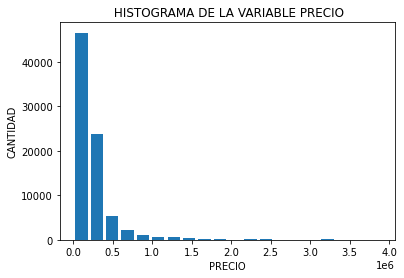

In [151]:
# Histograma de la columna precio.
plt.hist(data.price.values, bins = 20, density=False, rwidth = 0.8,)
plt.title(' HISTOGRAMA DE LA VARIABLE PRECIO')
plt.ylabel('CANTIDAD')
plt.xlabel('PRECIO')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

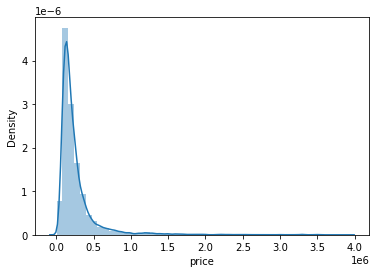

In [152]:
# Grafico de la distribucion de la variable precio
sns.distplot(data.price)

<AxesSubplot:xlabel='rooms', ylabel='Density'>

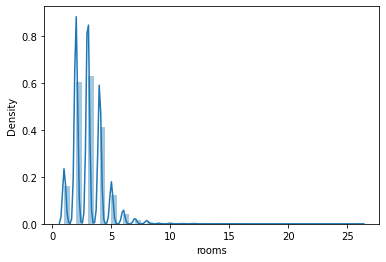

In [153]:
# Grafico de la distribucion de la variable rooms
sns.distplot(data.rooms)

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

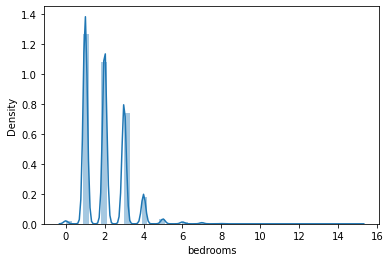

In [154]:
# Grafico de la distribucion de la variable bedrooms
sns.distplot(data.bedrooms)

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

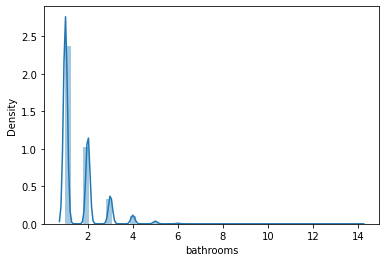

In [155]:
# Grafico de la distribucion de la variable bathrooms
sns.distplot(data.bathrooms)

<AxesSubplot:xlabel='surface_total', ylabel='Density'>

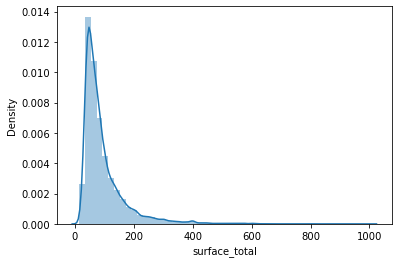

In [156]:
# Grafico de la distribucion de la variable surface_total
sns.distplot(data.surface_total)

<AxesSubplot:xlabel='surface_covered', ylabel='Density'>

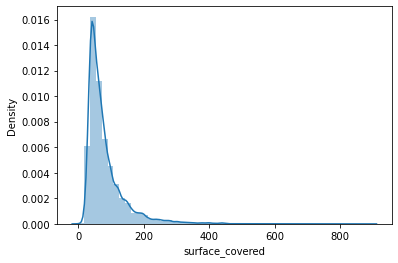

In [157]:
# Grafico de la distribucion de la variable surface_covered
sns.distplot(data.surface_covered)

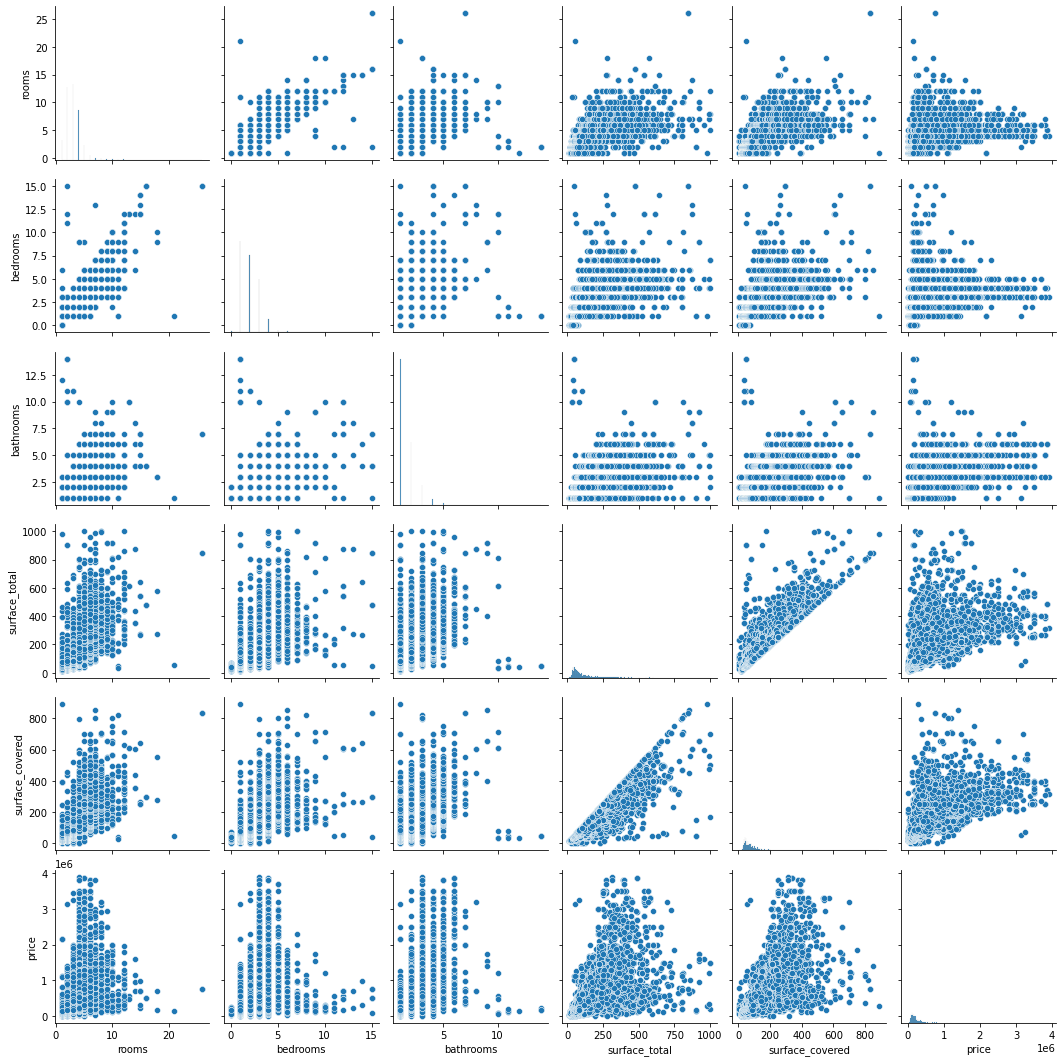

In [158]:
# Graficamos las relaciones por pares del dataset.
sns.pairplot(data=data)

(81092, 14)

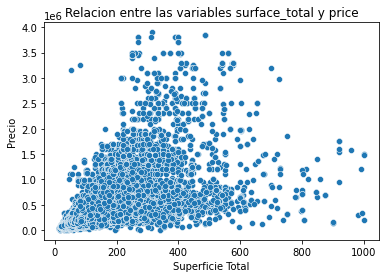

In [159]:
sns.scatterplot(x="surface_total", y="price", data = data)
plt.title('Relacion entre las variables surface_total y price')
plt.xlabel('Superficie Total')
plt.ylabel('Precio')
data.shape

(81092, 14)

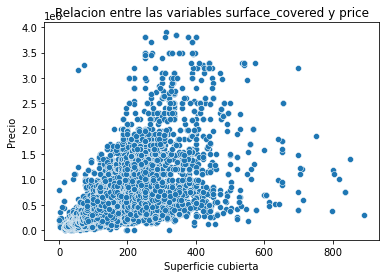

In [160]:
sns.scatterplot(x="surface_covered", y="price", data = data)
plt.title('Relacion entre las variables surface_covered y price')
plt.xlabel('Superficie cubierta')
plt.ylabel('Precio')
data.shape

In [161]:
# Se puede visualizar que existe una correlacion evidente entre precio y superficie total y cubierta.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [162]:
# Obtenemos la correlacion de las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price
corr = data.corr()
corr

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925463,0.600438,0.727138,0.762287,0.484408
bedrooms,0.925463,1.000000,0.603244,0.695688,0.727463,0.445447
bathrooms,0.600438,0.603244,1.000000,0.649202,0.694498,0.638532
surface_total,0.727138,0.695688,0.649202,1.000000,0.931322,0.686697
surface_covered,0.762287,0.727463,0.694498,0.931322,1.000000,0.749624
price,0.484408,0.445447,0.638532,0.686697,0.749624,1.000000


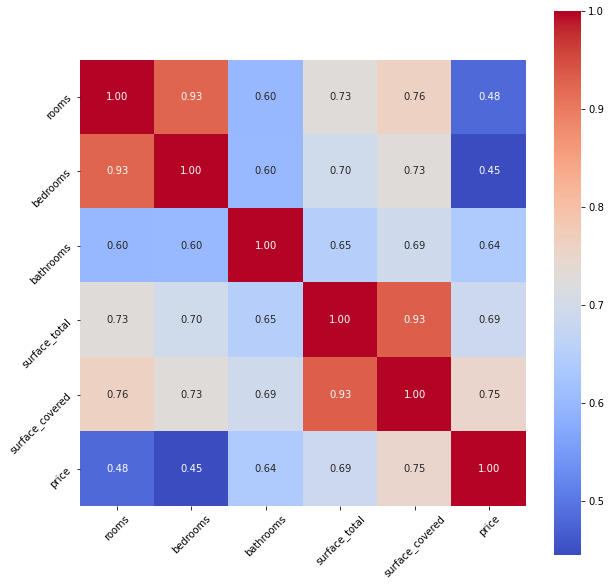

In [163]:
# Grafica mapa de calor a efectos de visualizar la correlacion existente entre las variables
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [164]:
# PODEMOS OBSERVAR UNA CLARA CORRELACION ENTRE PRECIO Y SUPERFICIE CUBIERTA

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


#### Algunas preguntas relacionadas al dataset:
* Cuanto es el precio por metro cuadrado?
* Hasta cuantos metros cuadrados tiene un dpto? 
* Segun el precio por metro cuadrado cual es el barrio mas caro?

In [165]:
# Agregamos una columna de precio por metro cuadrado
data['price_m2'] = data['price']/data['surface_total']

In [166]:
# Obtenemos una estadistica del precio por metro cuadrado
data.price_m2.describe()

count    81092.000000
mean      2760.548826
std       1157.199136
min         17.647059
25%       2096.153846
50%       2580.645161
75%       3179.501748
max      58333.333333
Name: price_m2, dtype: float64

In [167]:
# Obtenemos los promedios de las columnas del datset, agrupados por barrios.
data_price = data.groupby(['l3']).mean()
barrios_gp = data_price.sort_values(by= 'price', ascending = False)
barrios_gp = barrios_gp.reset_index()
barrios_gp.head(10)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_m2
0,Puerto Madero,3.052876,2.056363,2.719697,158.848344,143.725741,981050.004648,6090.116965
1,Las Cañitas,3.203488,2.203488,2.270073,116.981105,101.454942,462643.565407,3831.785370
2,Recoleta,3.484606,2.276553,1.812741,122.448169,111.950446,407840.884496,3334.417868
3,Belgrano,3.149690,2.134251,1.869998,109.378755,95.494882,373776.513509,3368.772202
4,Palermo,2.976742,1.941774,1.616055,96.165244,84.111328,350707.853785,3456.966083
5,Retiro,3.340233,2.143596,1.822686,115.454075,107.425614,347466.166882,2979.104063
6,Nuñez,2.829764,1.871499,1.626313,93.618891,79.311367,304061.489841,3252.420660
7,Barrio Norte,3.227889,2.161072,1.653571,99.175274,88.753712,296766.503873,3096.057192
8,Villa Devoto,3.223207,2.176471,1.546122,122.170830,93.486704,244770.091861,2248.223198
9,Coghlan,2.782353,1.790196,1.438735,88.411765,70.580392,226428.729412,2750.003013


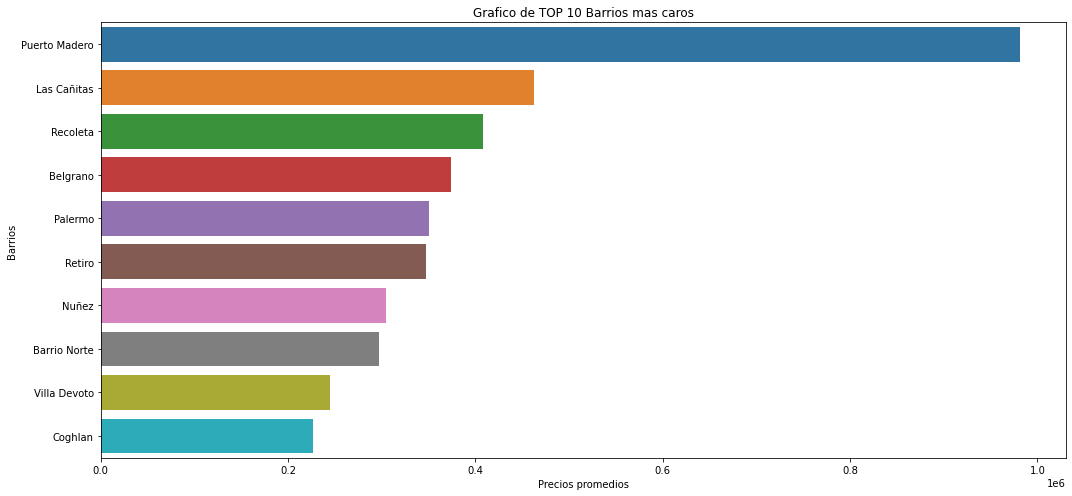

In [168]:
plt.figure(figsize = (15,7))
sns.barplot(data = barrios_gp.iloc[:10] , y = 'l3', x = 'price')
plt.title('Grafico de TOP 10 Barrios mas caros')
plt.ylabel('Barrios')
plt.xlabel('Precios promedios')
plt.tight_layout()
plt.show()

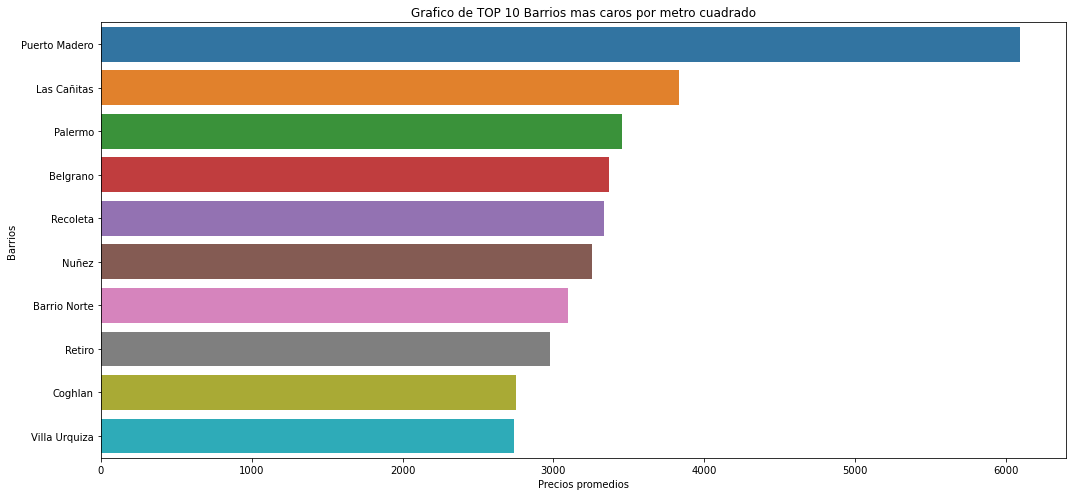

In [169]:
barrios_gp = barrios_gp.sort_values(by= 'price_m2', ascending = False)
plt.figure(figsize = (15,7))
sns.barplot(data = barrios_gp.iloc[:10] , y = 'l3', x = 'price_m2')
plt.title('Grafico de TOP 10 Barrios mas caros por metro cuadrado')
plt.ylabel('Barrios')
plt.xlabel('Precios promedios')
plt.tight_layout()
plt.show()

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

# FILTRAMOS EL DATASET

##### Seleccionamos aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa, seleccionamos aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2, seleccionamos aquellas propiedades cuya precio es menor 4000000 dólares, seleccionamos las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price, descartamos aquellas instacias con valores faltantes.

In [170]:
# Cargamos el dataset
data_propiedades = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df1 = pd.DataFrame(data_prop)

In [171]:
# Filtramos el dataset por la region con mas propiedades Capital Federal y por tipo de propiedad Departamento, PH, Casa.
region1 = df1[(df1.l2 == 'Capital Federal')]
dataset_ml = region1[(region1.property_type == 'Departamento') | (region1.property_type == 'PH') | (region1.property_type == 'Casa')]
dataset_ml.shape

(91485, 19)

In [172]:
# filtramos el dataset donde la superficie total se encuentre entre 15 m2 y 1000 m2
mask = dataset_ml["surface_total"]>= 15
dataset_ml = dataset_ml[mask]
mask2 = dataset_ml["surface_total"]<= 1000
dataset_ml = dataset_ml[mask2]

In [173]:
# filtramos el dataset por precio menor a usd 4.000.000
mask3 = dataset_ml.price <= 4000000
dataset_ml = dataset_ml[mask3]

In [174]:
# Seleccionamos las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
dataset_ml = dataset_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

In [175]:
# Descartamos los valores faltantes del dataset
dataset_ml = dataset_ml.dropna()

In [176]:
# Mostramos un poco la info del dataset
dataset_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81019 entries, 0 to 146558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            81019 non-null  float64
 1   bedrooms         81019 non-null  float64
 2   bathrooms        81019 non-null  float64
 3   surface_total    81019 non-null  float64
 4   surface_covered  81019 non-null  float64
 5   price            81019 non-null  float64
dtypes: float64(6)
memory usage: 4.3 MB


# Definimos las variables X e y de los modelos.
## Utilizamos las variables independientes: 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered' para predecir el precio, ya que son variables numericas con mas posibilidades de predecir el precio dada su correlacion con el objetivo.

In [177]:
# Seleccionamos las variables predictoras (X) y la variable a predecir (y).
X = dataset_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = dataset_ml['price']

## Metrica a utilizar para evaluar los modelos:

- RMSE

Vamos a elegir una metrica apropiada para evaluar nuestros modelos las cuales son RMSE que indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo. Es la métrica más comúnmente utilizada para las tareas de regresión y representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado. Tiene la propiedad útil de estar en las mismas unidades que la variable a predecir. Dicha metrica resulta afectada por valores outliers, por lo que el resultado se puede ver afectado si no se utilizan tecnicas para reducir los valores atipicos.
Los valores más bajos de RMSE indican un mejor ajuste. RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción, lo cual estamos intentando realizar. 

- R - CUADRADO

A efectos de obtener otra metrica para evaluar los modelos propongo R- cuadrado ya que indica la aptitud del modelo, muestra que tan bien las variables independientes seleccionadas explican la variabilidad en sus variables dependiente. R-cuadrado tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medio y 1 indica una predicción perfecta. La mejora en el modelo de regresión da como resultado aumentos proporcionales en R-cuadrado. Una de las dificultades de R-cuadrado es que solo puede aumentar a medida que se agregan predictores al modelo de regresión. Este aumento es artificial cuando los predictores no mejoran el ajuste del modelo.

Consideraciones: El valor absoluto de RMSE no indica realmente qué tan bueno / malo es un modelo. Solo se puede utilizar para comparar entre dos modelos, mientras que la R2 ajustada lo hace fácilmente. Por ejemplo, si un modelo ha ajustado R² igual a 0.05, definitivamente es malo. Sin embargo, si solo nos preocupamos por la precisión de la predicción, RMSE es lo mejor. Es computacionalmente simple, fácilmente diferenciable y está presente como métrica predeterminada para la mayoría de los modelos.

# CREAMOS UN BENCHMARK
### El mismo es un modelo de regresion lineal:

In [178]:
# Importamos train_test_split de sklearn
from sklearn.model_selection import train_test_split

In [179]:
# Separamos las variables en train y test con size de prueba de 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


In [180]:
# Generamos un benchmark Regresion Lineal a fin de obtener un modelo base.
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [181]:
# Entrenamos el modelo.
linear_model.fit(X_train, y_train)

LinearRegression()

In [182]:
# Generamos la variable predictora
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [183]:
# Imprimimos los coeficientes y la constante de la recta predicha
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807940825


In [184]:
# Importamos la metrica del error cuadratico medio
from sklearn.metrics import mean_squared_error

In [185]:
# Calculamos el valor del error cuadratico medio en Train
rmse_train_rl = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_train_rl

199173.83253528475

In [186]:
# Calculamos el valor del error cuadratico medio en Test
rmse_test_rlt = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test_rlt

202449.36540361567

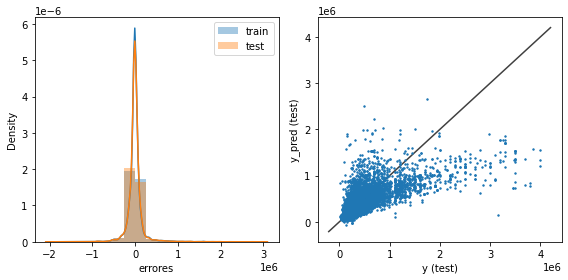

In [187]:
# Realizamos una visualizacion en paralelo del grafico de dispersion del error y la grafica entre el valor predicho y el valor testeado

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.tight_layout()

plt.show()

In [188]:
#R² Score metrica del modelo de regresion lineal en Train
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.5517887107017188

In [189]:
#R² Score metrica del modelo de regresion lineal en Test
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.5514864358797206

Podemos visualizar que el modelo de Benchmark realizado con regresion lineal, las metricas utilizadas:

- RMSE train = $ 199173.83253528475.

- RMSE test = $ 202449.36540361567.

- R2 train = 0.5517887107017188.

- R2 test = 0.5514864358797206.

Las cuales suponen una base a partir de la cual mejorar con otros modelos de regresion.

# Modelo de arbol de decision regresion

In [190]:
# Importamos el arbol de decision regresion e instanciamos los objetos para cada modelo, de base utilizamos una profundidad del arbol de 5.
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
# Entrenamos el modelo
tree_regressor.fit(X_train, y_train)
# Generamos la variable predictora para entrenamiento y testeo del arbol de desicion regresion
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

In [191]:
# Calculamos el valor del error cuadratico medio en train
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_train

169200.1754118897

In [192]:
# Calculamos el valor del error cuadratico medio en test
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test

174352.7367379676

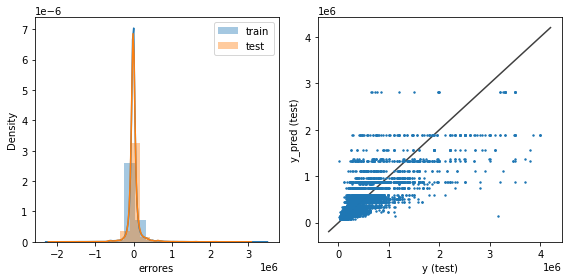

In [193]:
# Realizamos una visualizacion en paralelo del grafico de dispersion del error y la grafica entre el valor predicho y el valor testeado
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [194]:
#R² Score
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.6765405464154612

In [195]:
#R² Score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.667340232593526

## A fin de optimizar los hiperparametros en el modelo de Arboles de desicion realizamos el siguiente bloque de codigo.

Text(0, 0.5, 'RMSE')

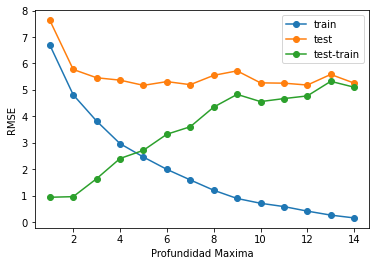

In [303]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []
lista_accuracy_dif = []

# Definimos la lista de valores de k que vamos a explorar
max_depths = range(1,15)

# Generamos en loop sobre los distintos valores de k 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    Dtr = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Entrenar el modelo
    Dtr.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = Dtr.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = Dtr.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)
    lista_accuracy_dif.append(test_acc-train_acc)
    
# Graficamos a fin de visualizar los mejores hiperparametros:

plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.plot(max_depths,lista_accuracy_dif,'o-',label='test-train')
plt.legend()
plt.xlabel('Profundidad Maxima')
plt.ylabel('RMSE')

In [197]:
# visualizamos en la grafica que el mejor hiperparametro es max_depth=12 para DecisionTreeRegressor(), 
# ya que alli es donde se visualiza el minimo RMSE, donde todavia no se produce overfitting de los datos segun se muestra en la grafica.
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=12, random_state=42)
# Entrenamos el modelo
tree_regressor.fit(X_train, y_train)
# Generamos la variable predictora para entrenamiento y testeo del arbol de desicion regresion
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

In [198]:
# Calculamos el valor del error cuadratico medio en train
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_train

101186.65188945616

In [199]:
# Calculamos el valor del error cuadratico medio en test
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test

149098.59329962902

In [200]:
#R² Score
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8843182945306058

In [201]:
#R² Score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7567292835275337

Podemos visualizar que el modelo de DecisionTreeRegressor, las metricas utilizadas:

- RMSE train = $ 101186.65188945616.

- RMSE test = $ 149098.59329962902.

- R2 train = 0.8843182945306058.

- R2 test = 0.7567292835275337.

Los cuales suponen una mejora con respecto al modelo Benchmark y al modelo de arboles de desicion regresion, sin optimizar los hiperparametros.

# Modelo de vecinos mas cercanos regresion

In [202]:
# Importamos vecinos mas cercanos e instanciamos el objeto para el modelo, con un hiperparametro de n_neighbors=2.
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=2)
# Entrenamos el modelo:
knn_regressor.fit(X_train, y_train)
# Generamos la variable predictora para entrenamiento y testeo del vecinos mas cercanos regresion
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

In [203]:
# Importamos la metrica del error cuadratico medio
from sklearn.metrics import mean_squared_error

In [204]:
# Calculamos el valor del error cuadratico medio en train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_train

92435.07024633957

In [205]:
# Calculamos el valor del error cuadratico medio en test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test

153607.76698581807

In [206]:
#R² Score en train
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.9034634482582818

In [207]:
#R² Score en test
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.741792356741449

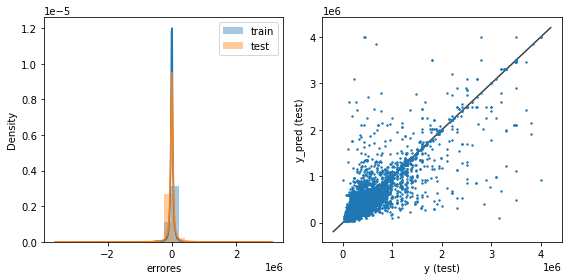

In [208]:
# Realizamos una visualizacion en paralelo del grafico de dispersion del error y la grafica entre el valor predicho y el valor testeado
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## A fin de optimizar los hiperparametros en el modelo de vecinos mas cercanos realizamos el siguiente bloque de codigo.

Text(0, 0.5, 'RMSE')

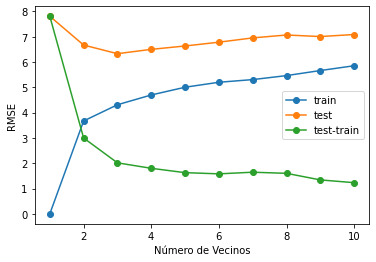

In [302]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []
lista_accuracy_dif = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knr = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knr.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knr.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knr.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)
    lista_accuracy_dif.append(test_acc-train_acc)
# Graficamos a fin de visualizar los mejores hiperparametros:

plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.plot(k_vecinos,lista_accuracy_dif,'o-',label='test-train')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')

In [304]:
# visualizamos en la grafica que el mejor hiperparametro para KNeighborsRegressor(n_neighbors=3), ya que alli es donde se visualiza el minimo RMSE, 
# donde todavia no se produce overfitting de los datos segun se muestra en la grafica.
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
# Entrenamos el modelo:
knn_regressor.fit(X_train, y_train)
# Generamos la variable predictora para entrenamiento y testeo del vecinos mas cercanos regresion
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

In [211]:
# Calculamos el valor del error cuadratico medio en train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_train

103804.20852724434

In [212]:
# Calculamos el valor del error cuadratico medio en test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test

152317.82229037234

In [213]:
#R² Score en train
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8782558355018295

In [214]:
#R² Score en test
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7461108240704453

Podemos visualizar que el modelo de KNeighborsRegressor, las metricas utilizadas:

- RMSE train = $ 103804.20852724434.

- RMSE test = $ 152317.82229037234.

- R2 train = 0.8782558355018295.

- R2 test = 0.7461108240704453.

Los cuales suponen una mejora con respecto al modelo Benchmark y al modelo de vecinos mas cercanos sin optimizar los hiperparametros.

- Entre los modelos entrenados, elegiria arboles de desicion regresion ya que obtengo un RMSE mas bajo respecto del benchmark y KNeighborsRegressor, y ademas se ejecuto mas rapido que este ultimo, ya que utiliza menos recursos.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


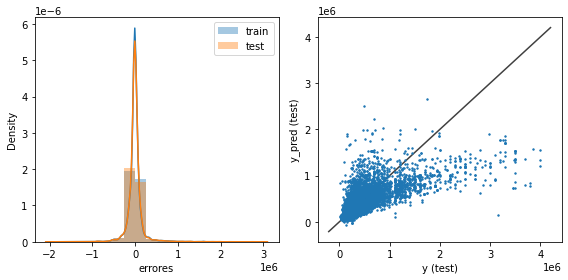

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 101186.65188945616
Raíz del error cuadrático medio en Test: 149098.59329962902


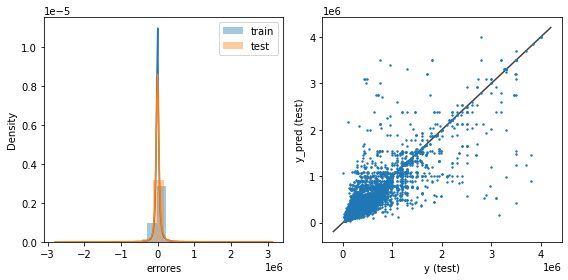

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


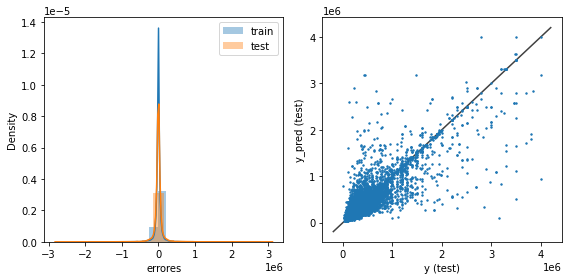

In [216]:
# GRAFICA DE COMPARATIVA DE LOS 3 MODELOS REALIZADOS, CON SUS RESPECTIVAS METRICAS RMSE.
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## CONCLUSION:
* Analizando los modelos propuestos, elegiria al arbol de desicion regresion, ya que me permite obtener, mediante la optimizacion manual de hiperparámetros, un error cuadratico medio menor que el benchmark utilizado de regresion lineal y el modelo de vecinos mas cercanos, a efectos de predecir el precio de un inmueble.
* Visualizamos las variables categoricas de regiones, barrios y tipos de inmuebles para ver su composicion y la cantidad de valores de estas variables que contenia el dataset.
* Analizamos la variable 'Price' sola y con las variables más correlacionadas, tratamos con datos faltantes y valores atípicos, visualizamos estadísticas fundamentales.
* Al modelar y entrenar los 3 modelos obtenemos un alto error cuadratico medio, se debe realizar ingenieria de features en el dataset a fin de obtener una mayor calidad en los datos.
* Se deberia contemplar la ubicacion de los inmuebles a fin de obtener una estimacion mejor del precio.
* Bedrooms y rooms es informacion que esta repetida o de mas.
* Analizar los modelos con los datos para inmuebles comunes e inmuebles de lujo podria ser una buena mejora para el target a predecir.

# ADICIONAL
- Nos preguntamos si el dataset que viene incorporado en sklearn.datasets de boston puede predecir el precio con un RMSE relativamente bajo en comparacion con el que encontramos en properati, ya que nos dio un error muy alto. y si esto tendra que ver con el dataset, con su ingenieria de feartures o si es por el modelo.

In [282]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [283]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [284]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [285]:
bs = pd.DataFrame(boston['data'],columns = boston['feature_names'])

In [286]:
bs['PRICE'] = boston['target']

In [287]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [288]:
bs.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


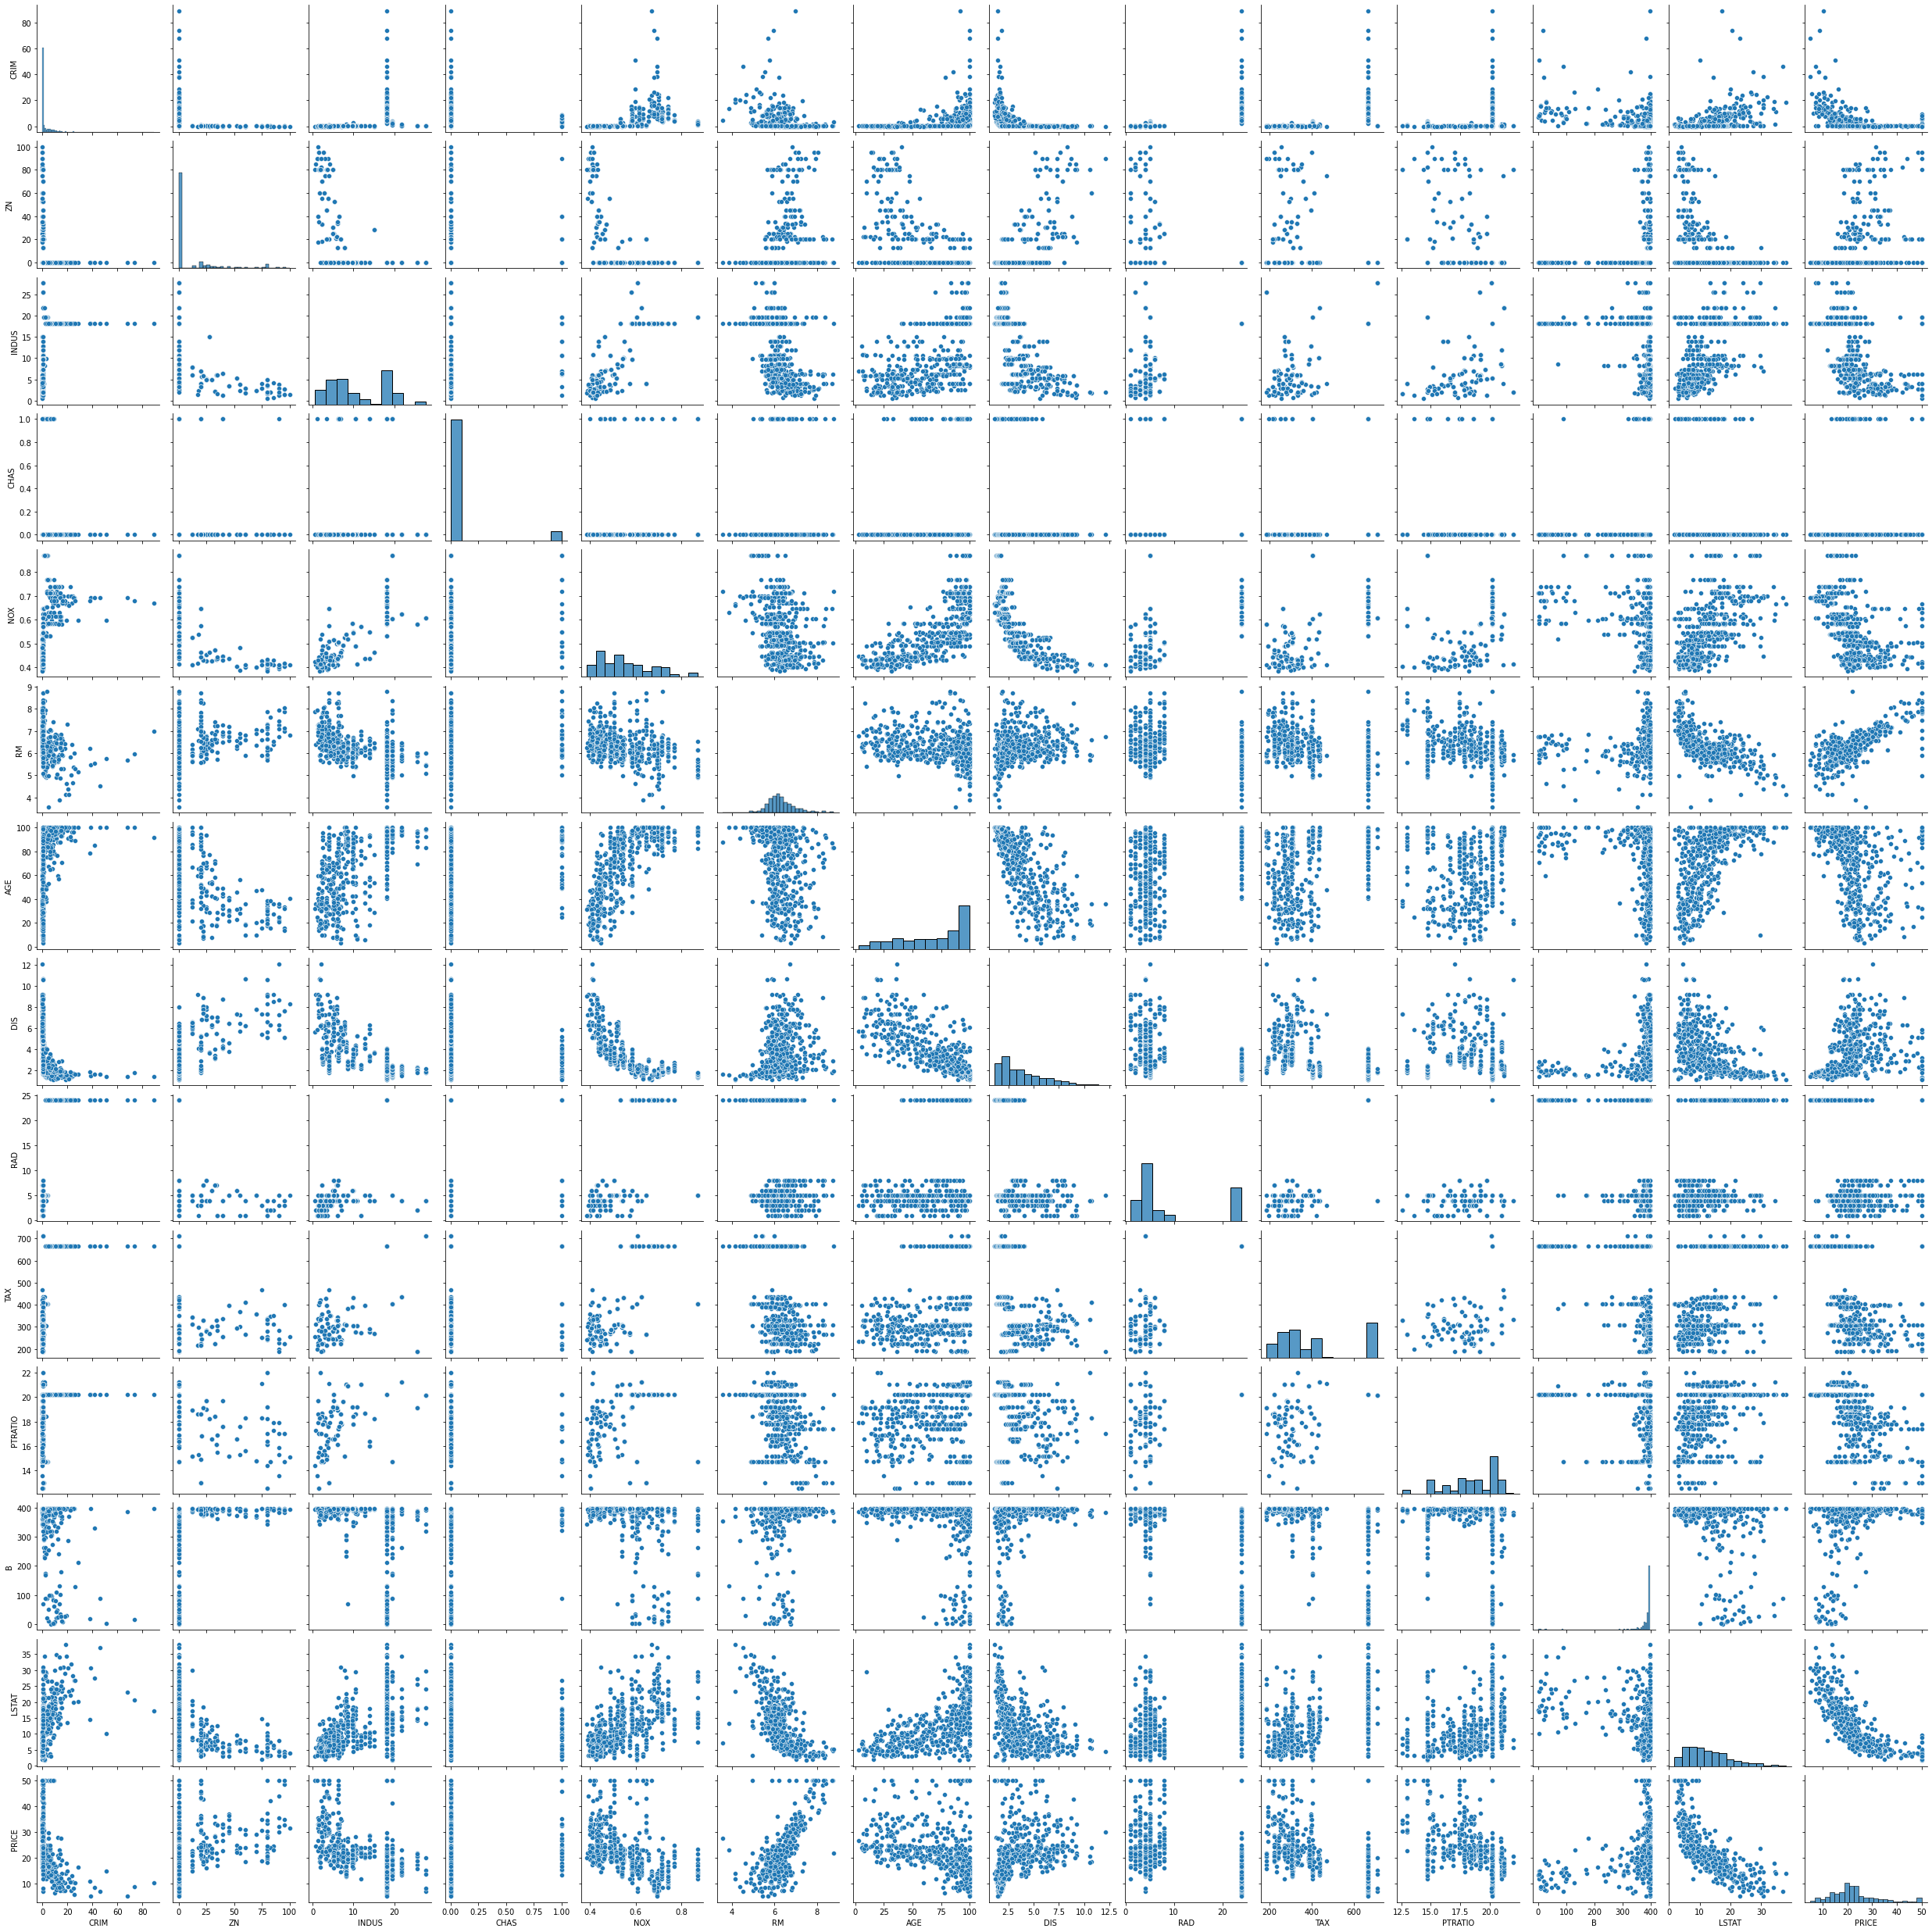

In [290]:
sns.pairplot(data=bs)

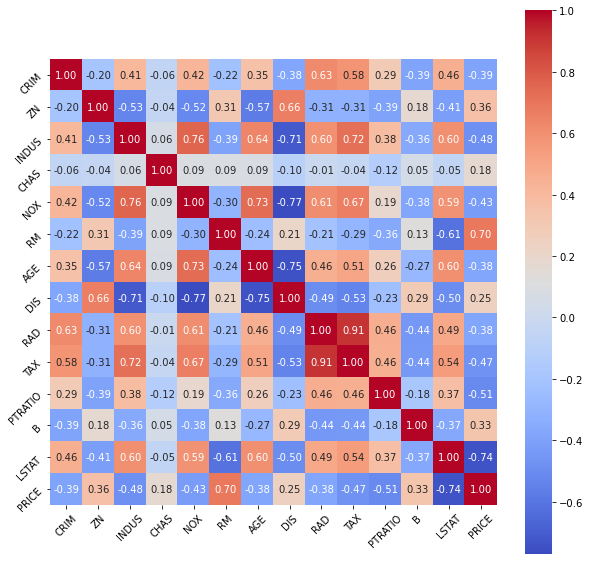

In [292]:
corr = bs.corr()
corr
# Grafica mapa de calor a efectos de visualizar la correlacion existente entre las variables
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [299]:
X = bs.drop(['PRICE'],axis=1)
y = bs['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()

# fit model
model.fit(X_train, y_train)

# make class predictions for the testing set
y_test_pred = model.predict(X_test)

In [300]:
# Calculamos el valor del error cuadratico medio en test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test*1000

5457.311159564058

# CONCLUSIONES:
  -  CLARAMENTE PODEMOS VISUALIZAR QUE CON UN MODELO BASICO DE LINEAR REGRESSION PODEMOS ENCONTRAR UN ERROR CUADRATICO MEDIO DE $ 5.457, (OBVIAMENTE QUE NO SE CONSIDERAN LAS MISMAS VARIABLES PARA PREDECIR EL PRECIO PERO ES UNA IDEA DE CUANTO PUEDE VALER UN RMSE PARA TENER DE REFERENCIA), EL CUAL ES MUY BAJO EN COMPARACION CON EL ERROR DEL MEJOR MODELO POR LO QUE CONSIDERO QUE DEBERIAMOS REALIZAR UNA MEJOR INGENIERIA DE FEATURES PARA MEJORAR EL RMSE.